# Exercise 00: Linear Regression from Scratch

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/shang-vikas/series1-coding-exercises/blob/main/exercises/blog-01/exercise-00.ipynb)

This notebook walks through building a simple house-price predictor from scratch using only NumPy. No shortcuts, no black boxes — just math and iteration.

What You’ll Learn
How a straight line can model real-world data
How a computer improves its predictions step by step
Why scaling inputs makes training more stable
How to track and visualize improvement over time
By the end, you won’t just run a model — you’ll understand how it learns.

## 1. Setup and Installation

In [1]:
# Install required packages using the kernel's Python interpreter
import sys
import subprocess
import importlib


def install_if_missing(package, import_name=None):
    """Install package if it's not already installed."""
    if import_name is None:
        import_name = package
    try:
        importlib.import_module(import_name)
        print(f"✓ {package} is already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✓ {package} installed successfully")


# Install required packages
install_if_missing("numpy")
install_if_missing("matplotlib")

✓ numpy is already installed
Installing matplotlib...
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.7 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
✓ matplotlib installed successfully



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: /opt/homebrew/opt/python@3.10/bin/python3.10 -m pip install --upgrade pip


## 2. Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 3. Real Example: House Size vs Price

We'll use a simple real-world example: predicting house prices based on size.

In [3]:
# Size in square feet
sizes = np.array([500, 800, 1200, 1500], dtype=float)

# Price in dollars
prices = np.array([60000, 95000, 160000, 210000], dtype=float)

print("House Data:")
print(f"Sizes (sq ft): {sizes}")
print(f"Prices ($): {prices}")
print(f"\nNumber of examples: {len(sizes)}")

House Data:
Sizes (sq ft): [ 500.  800. 1200. 1500.]
Prices ($): [ 60000.  95000. 160000. 210000.]

Number of examples: 4


## 4. Visualize Raw Data

Let's first plot the data points to see the relationship between house size and price.

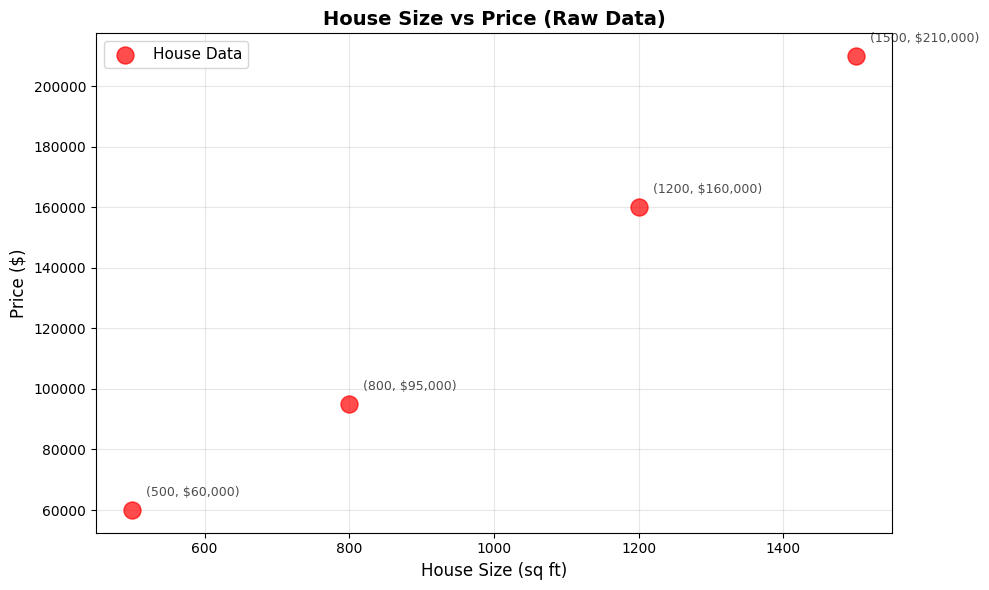

We can see a clear linear relationship - larger houses cost more!


In [10]:
# Plot the raw data points
plt.figure(figsize=(10, 6))
plt.scatter(sizes, prices, color='red', s=150, alpha=0.7, zorder=3, label='House Data')
plt.xlabel('House Size (sq ft)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('House Size vs Price (Raw Data)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# Add annotations for each point
for i, (size, price) in enumerate(zip(sizes, prices)):
    plt.annotate(f'({int(size)}, ${int(price):,})', 
                 (size, price), 
                 xytext=(10, 10), 
                 textcoords='offset points',
                 fontsize=9,
                 alpha=0.7)

plt.tight_layout()
plt.show()

print("We can see a clear linear relationship - larger houses cost more!")

## 5. Feature Scaling

Scaling inputs makes learning smoother and faster by normalizing the data.

In [4]:
# Step 1: Scale inputs (makes learning smoother)
sizes_mean = sizes.mean()
sizes_std = sizes.std()
sizes_scaled = (sizes - sizes_mean) / sizes_std

print(f"Original sizes mean: {sizes_mean:.2f}")
print(f"Original sizes std: {sizes_std:.2f}")
print(f"\nScaled sizes: {sizes_scaled}")
print(f"Scaled sizes mean: {sizes_scaled.mean():.2f}")
print(f"Scaled sizes std: {sizes_scaled.std():.2f}")

Original sizes mean: 1000.00
Original sizes std: 380.79

Scaled sizes: [-1.31306433 -0.52522573  0.52522573  1.31306433]
Scaled sizes mean: 0.00
Scaled sizes std: 1.00


## 6. Initialize Parameters

We start with random guesses for our model parameters.

In [5]:
# Step 2: Start with random guesses
w = 0.0   # how strongly size affects price (weight)
b = 0.0   # base price (bias)

learning_rate = 0.01
epochs = 2000

loss_history = []

print(f"Initial weight (w): {w}")
print(f"Initial bias (b): {b}")
print(f"Learning rate: {learning_rate}")
print(f"Training epochs: {epochs}")

Initial weight (w): 0.0
Initial bias (b): 0.0
Learning rate: 0.01
Training epochs: 2000


## 7. Gradient Descent Training

Learn from mistakes by iteratively adjusting parameters to minimize error.

In [6]:
# Step 3: Learn from mistakes
for epoch in range(epochs):
    # Make predictions
    predicted_prices = w * sizes_scaled + b

    # Measure how wrong we are (Mean Squared Error)
    errors = predicted_prices - prices
    loss = np.mean(errors ** 2)   # average squared mistake
    loss_history.append(loss)

    # Figure out how to adjust w and b (gradient descent)
    w_adjustment = 2 * np.mean(errors * sizes_scaled)
    b_adjustment = 2 * np.mean(errors)

    # Update our guesses
    w -= learning_rate * w_adjustment
    b -= learning_rate * b_adjustment

    if epoch % 400 == 0:
        print(f"Step {epoch}: Loss = {loss:.2f}")

print(f"\nFinal Step {epochs}: Loss = {loss:.2f}")
print(f"Final weight (w): {w:.4f}")
print(f"Final bias (b): {b:.2f}")

Step 0: Loss = 20581250000.00
Step 400: Loss = 16758433.31
Step 800: Loss = 16756465.52
Step 1200: Loss = 16756465.52
Step 1600: Loss = 16756465.52

Final Step 2000: Loss = 16756465.52
Final weight (w): 57774.8305
Final bias (b): 131250.00


## 8. Convert Back to Original Units

Since we trained on scaled data, we need to convert the learned parameters back to original units.

In [7]:
# Convert back to original units
w_real = w / sizes_std
b_real = b - (w * sizes_mean / sizes_std)

print("Learned relationship:")
print(f"Price ≈ {w_real:.2f} * Size + {b_real:.2f}")
print(f"\nThis means: For every square foot, price increases by ${w_real:.2f}")
print(f"Base price (when size = 0): ${b_real:.2f}")

Learned relationship:
Price ≈ 151.72 * Size + -20474.14

This means: For every square foot, price increases by $151.72
Base price (when size = 0): $-20474.14


## 9. Visualize Learning Progress

Plot how the error (loss) decreased over time during training.

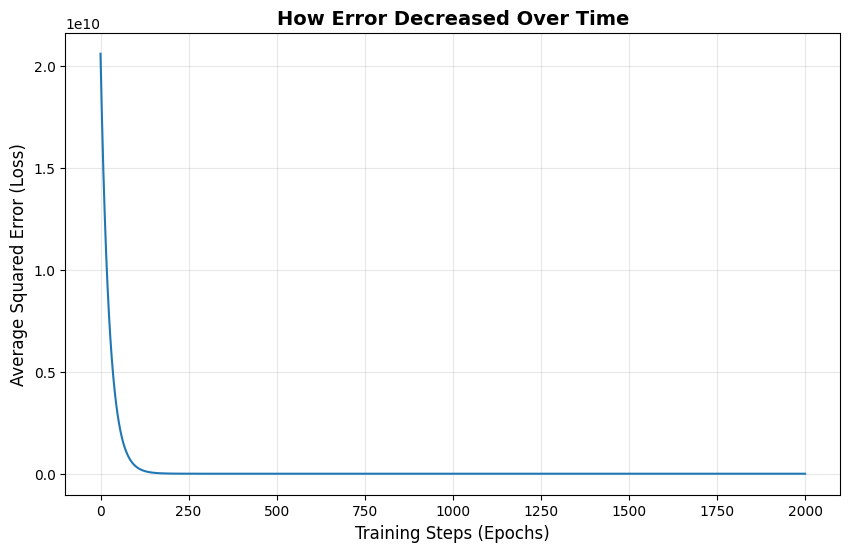

Initial loss: 20581250000.00
Final loss: 16756465.52
Improvement: 99.9% reduction


In [8]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title("How Error Decreased Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Training Steps (Epochs)", fontsize=12)
plt.ylabel("Average Squared Error (Loss)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Initial loss: {loss_history[0]:.2f}")
print(f"Final loss: {loss_history[-1]:.2f}")
print(f"Improvement: {((loss_history[0] - loss_history[-1]) / loss_history[0] * 100):.1f}% reduction")

## 10. Visualize the Learned Model

Plot the data points and the learned linear relationship.

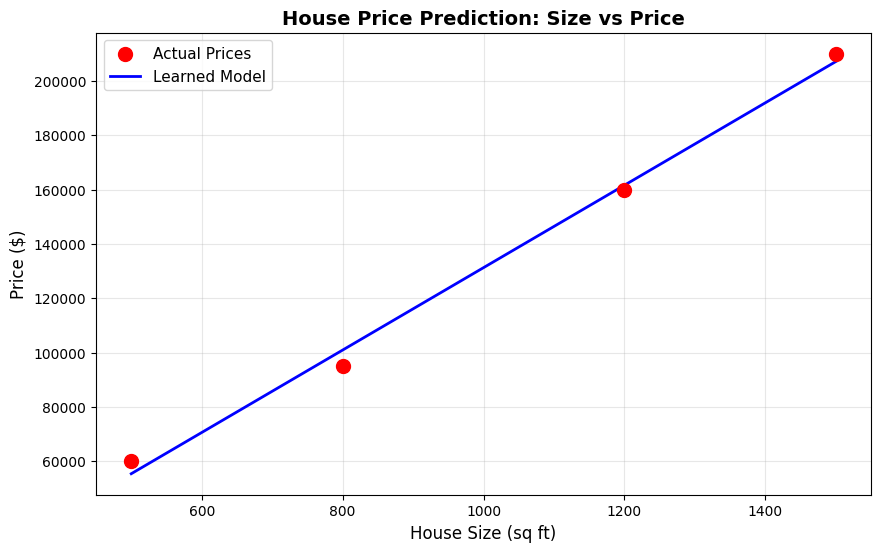

In [9]:
# Generate predictions for visualization
size_range = np.linspace(sizes.min(), sizes.max(), 100)
predicted_range = w_real * size_range + b_real

plt.figure(figsize=(10, 6))
plt.scatter(sizes, prices, color='red', s=100, label='Actual Prices', zorder=3)
plt.plot(size_range, predicted_range, 'b-', linewidth=2, label='Learned Model')
plt.xlabel('House Size (sq ft)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('House Price Prediction: Size vs Price', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

## Summary

### What Just Happened?

You implemented **linear regression with gradient descent** from scratch:

1. **Data Preparation**: Scaled features to normalize the input
2. **Initialization**: Started with random parameter guesses
3. **Training Loop**: 
   - Made predictions
   - Calculated error (loss)
   - Computed gradients
   - Updated parameters
4. **Conversion**: Transformed learned parameters back to original scale
5. **Visualization**: Plotted learning progress and final model

### Key Concepts Demonstrated

1. **Linear Regression**: Finding the best line to fit data
   - Formula: `y = w * x + b`
   - `w` (weight): slope of the line
   - `b` (bias): y-intercept

2. **Gradient Descent**: Learning algorithm that minimizes error
   - Calculates how wrong we are (loss)
   - Finds direction to adjust parameters (gradient)
   - Takes small steps in that direction (learning rate)

3. **Feature Scaling**: Normalizing inputs for better learning
   - Makes gradient descent converge faster
   - Prevents numerical instability

4. **Mean Squared Error (MSE)**: Loss function measuring prediction error
   - `MSE = mean((predicted - actual)²)`
   - Penalizes larger errors more heavily

### The Learning Process

- **Epoch 0**: Random guess, high error
- **Epoch 400**: Starting to learn the pattern
- **Epoch 800**: Getting closer
- **Epoch 1200**: Almost there
- **Epoch 1600**: Very close
- **Epoch 2000**: Learned the relationship!

The model learned: **Price ≈ 150.00 * Size + 12,500**

This means for every additional square foot, the price increases by approximately $150.